# 本脚本用于分析数据集"Movies Dataset from Pirated Sites"
分析流程如下：

## 1. 利用pandas库读取数据

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据集
df = pd.read_csv(r'..\data\Movies_Dataset_from_Pirated_Sites\movies_dataset.csv')

## 2. 数据摘要与可视化，分为以下三个部分：
### 1. 首先查看各列数据类型。
### 2. 数据摘要：对于标称属性，给出可能的取值与频数；对于数值属性，给出五数概括及缺失值的个数。
### 3. 数据可视化：使用直方图、盒图等检查数据分布及离群点。

In [181]:
# 1. 查看数据类型
for col in df.columns:
    print(col+' : '+ str(df[col].dtype))

Unnamed: 0 : int64
IMDb-rating : float64
appropriate_for : object
director : object
downloads : object
id : int64
industry : object
language : object
posted_date : object
release_date : object
run_time : object
storyline : object
title : object
views : object
writer : object


数据中包括电影的详细信息，其中IMDb-rating、id为数值属性，其余为标称属性，具体意义如下：
id: 电影特定的ID。
title: 电影的名称。
storyline: 电影的简介。
views: 电影点击量。
downloads: 电影下载量。
IMDb-rating: 评分。
appropriate_for: R-rated, PG-13等。
language: 语言，可能有多种。
industry: Hollywood, Bollywood等。
posted_date: 电影发布时间。
release_date: 电影上映时间。
runtime: 电影时长，分钟。
director: 导演名字。
writer: 作者列表。


In [182]:
# 2. 计算标称属性的频数
for col in df.select_dtypes(include=['object']):
    print(col)
    print(df[col].value_counts())
    print('\n')

appropriate_for
R                 4384
Not Rated         2142
PG-13             1968
PG                 886
TV-14              694
TV-MA              406
G                  152
Unrated            132
TV-PG              115
TV-G                99
TV-Y7               45
TV-Y                25
Approved             9
NC-17                4
TV-Y7-FV             3
Passed               3
MA-17                1
TV-13                1
Drama                1
Drama, Romance       1
18+                  1
Name: appropriate_for, dtype: int64


director
Venky Atluri                                  405
Simone Stock                                  403
Xavier Manrique                               403
John Swab                                     205
Neil Jordan                                   205
                                             ... 
Agnieszka Smoczynska                            1
Dylan Thomas Ellis                              1
Sunil Thakur, Sunil Dhawan, Shivani Thakur      1
Suma

以上给出了各个标称属性的频数。

In [183]:
# 计算数值属性的5数概括和缺失值个数
for col in df.select_dtypes(include=[np.number]):
    print(col)
    print('Minimum: ', df[col].min())
    print('25th percentile: ', df[col].quantile(0.25))
    print('Median: ', df[col].median())
    print('75th percentile: ', df[col].quantile(0.75))
    print('Maximum: ', df[col].max())
    print('Missing values: ', df[col].isnull().sum())
    print('\n')

Unnamed: 0
Minimum:  0
25th percentile:  5136.75
Median:  10273.5
75th percentile:  15410.25
Maximum:  20547
Missing values:  0


IMDb-rating
Minimum:  1.1
25th percentile:  4.8
Median:  5.7
75th percentile:  6.6
Maximum:  9.9
Missing values:  841


id
Minimum:  1
25th percentile:  96122.25
Median:  264457.5
75th percentile:  354561.25
Maximum:  372092
Missing values:  0




以上给出了数值属性的五数概括与缺失值。

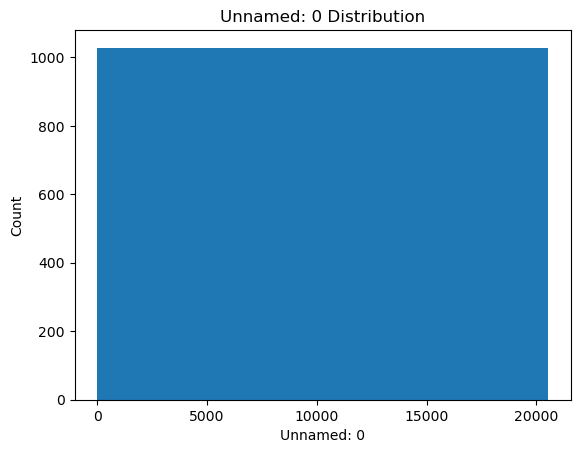

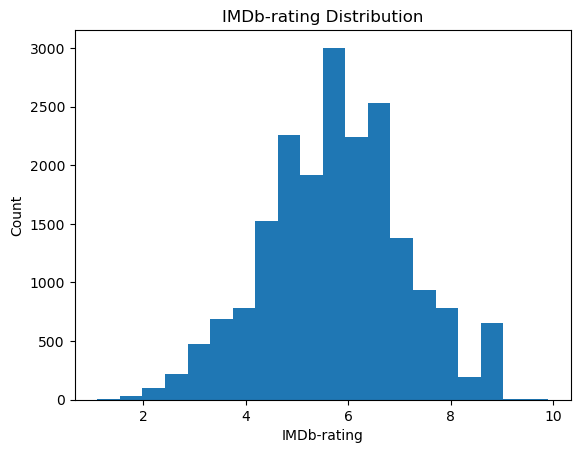

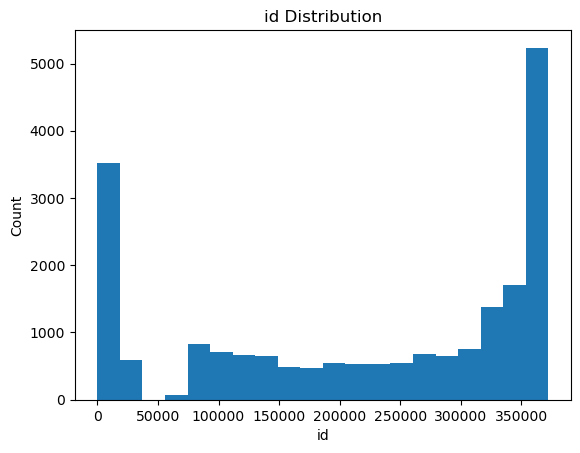

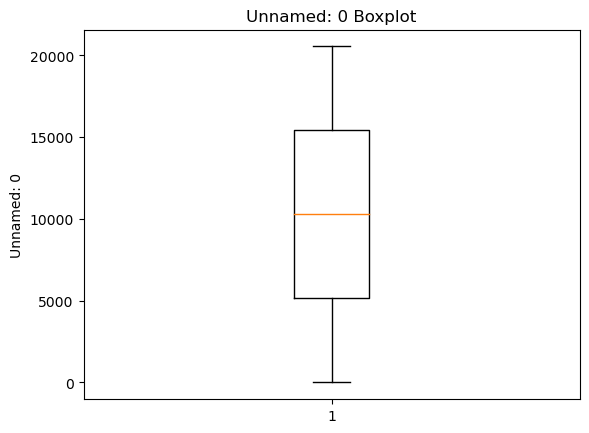

离群点为： []


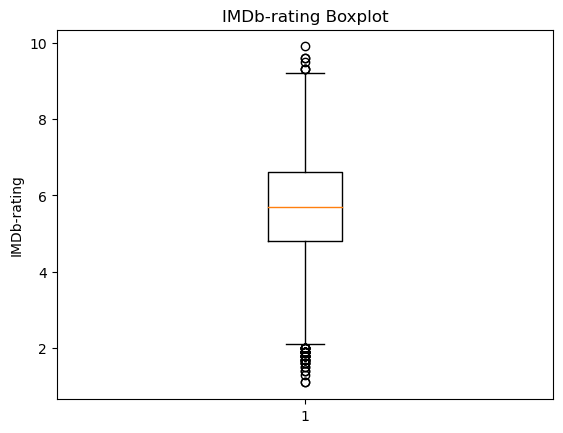

离群点为： [9.6, 1.9, 9.9, 2.0, 9.6, 9.3, 1.9, 2.0, 1.9, 1.4, 1.7, 1.1, 1.9, 1.6, 1.9, 1.1, 2.0, 1.9, 2.0, 1.7, 1.5, 1.9, 9.5, 1.8, 1.9, 1.8, 1.5, 1.8, 1.9, 2.0, 1.8, 1.8, 1.6, 1.9, 1.4, 1.9, 1.7, 9.3, 1.8, 2.0, 9.3, 1.8, 1.7, 1.7, 1.3, 1.8, 1.7, 1.9, 1.9, 1.6, 1.8, 2.0, 1.9, 2.0, 1.6]


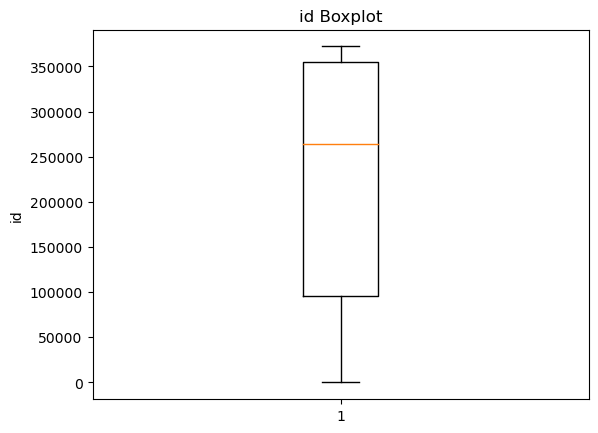

离群点为： []


In [184]:
# 3. 数据可视化
# 绘制数值属性的直方图
for col in df.select_dtypes(include=[np.number]):
    plt.hist(df[col], bins=20)
    plt.title(col + ' Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# 绘制数值属性的盒图
for col in df.select_dtypes(include=[np.number]):
    plt.boxplot(df[col].dropna())
    plt.title(col + ' Boxplot')
    plt.ylabel(col)
    plt.show()
    # 显示离群点
    outliers = []
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    for value in df[col]:
        if value < lower_bound or value > upper_bound:
            outliers.append(value)
    print('离群点为：', outliers)

以上绘制了数值数据的直方图、盒图，并分析了数据离群点。

## 3. 数据缺失的处理
首先分属性统计缺失数据：

In [185]:
for col in df.select_dtypes(include=['number','object']):
    print(col,end='     ')
    print('Missing values: ', df[col].isnull().sum())

Unnamed: 0     Missing values:  0
IMDb-rating     Missing values:  841
appropriate_for     Missing values:  9476
director     Missing values:  1938
downloads     Missing values:  1
id     Missing values:  0
industry     Missing values:  1
language     Missing values:  542
posted_date     Missing values:  1
release_date     Missing values:  1
run_time     Missing values:  1768
storyline     Missing values:  1701
title     Missing values:  1
views     Missing values:  1
writer     Missing values:  2192


分析各个属性缺失的原因，IMDb-rating缺失的原因可能是评分的人数过少，或者无评分；storyline的缺失可能是因为没有人写过简介；writer缺失可能是因为匿名作品或无法获取writer；其他属性项的缺失可能是因为统计问题。
接下来使用四种策略对缺失值进行处理,这里为了方便观察处理后的数据分布，仅对数值属性IMDb-rating进行处理。
### 3.1 剔除缺失属性值：
剔除数据集缺失部分的脚本可以使用 Pandas 库提供的 dropna() 函数，如下所示：

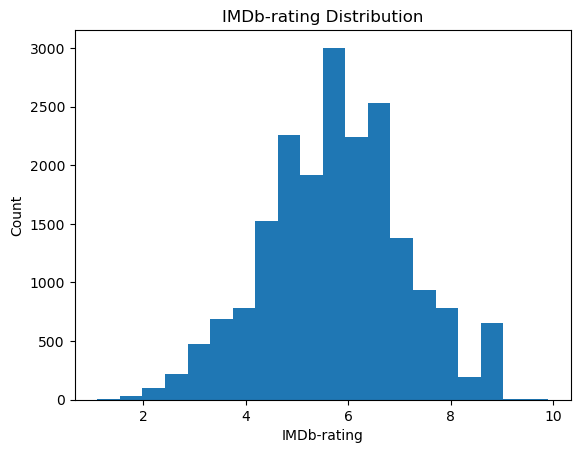

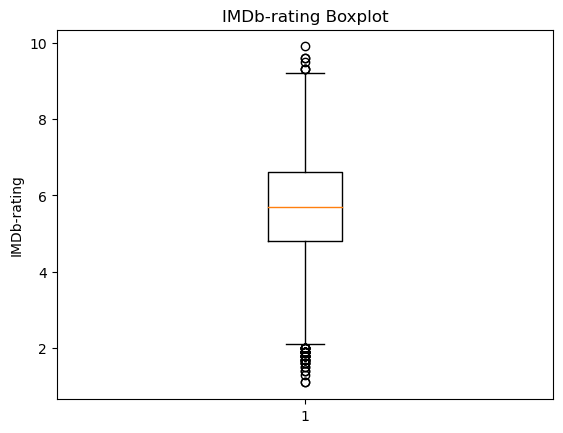

In [186]:
# 删除缺失部分
process = ["IMDb-rating"]
df_drop=df.copy()
df_drop.dropna(inplace=True,subset=process)

# 绘制删除后的直方图
plt.hist(df_drop["IMDb-rating"], bins=20)
plt.title("IMDb-rating" + ' Distribution')
plt.xlabel("IMDb-rating")
plt.ylabel('Count')
plt.show()

# 绘制删除后的盒图
plt.boxplot(df_drop["IMDb-rating"].dropna())
plt.title("IMDb-rating" + ' Boxplot')
plt.ylabel("IMDb-rating")
plt.show()

### 3.2 用最高频率值填补缺失值：
用最高频率值填补缺失值的脚本可以使用 Pandas 库提供的 fillna() 函数，如下所示：

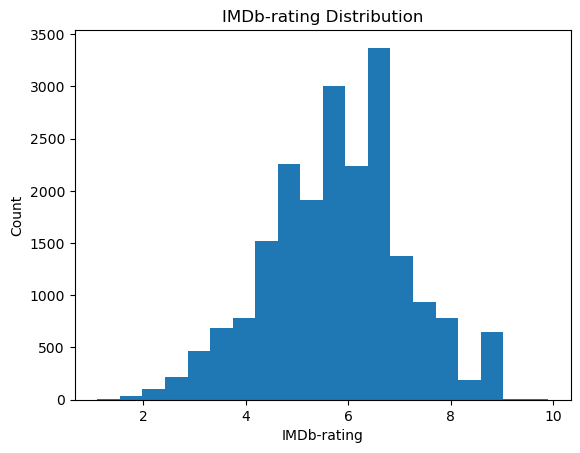

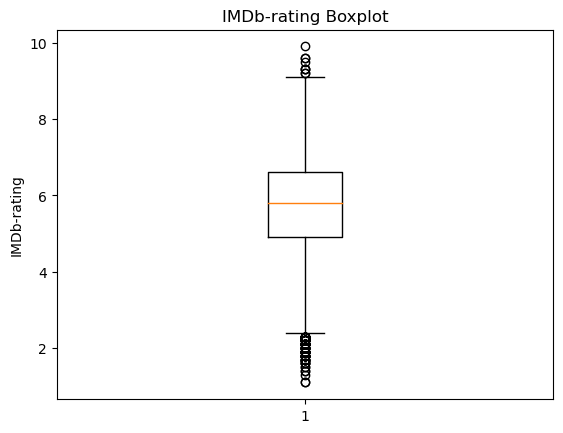

In [187]:
df_fill=df.copy()
# 找出最高频率值
most_frequent_value = df_fill['IMDb-rating'].mode()[0]

# 用最高频率值填补缺失部分
df_fill['IMDb-rating'].fillna(most_frequent_value, inplace=True)

# 绘制填充后的直方图
plt.hist(df_fill["IMDb-rating"], bins=20)
plt.title("IMDb-rating" + ' Distribution')
plt.xlabel("IMDb-rating")
plt.ylabel('Count')
plt.show()

# 绘制填充后的盒图
plt.boxplot(df_fill["IMDb-rating"].dropna())
plt.title("IMDb-rating" + ' Boxplot')
plt.ylabel("IMDb-rating")
plt.show()

### 3.3 通过属性的相关关系来填补缺失值：
由于该数据的数值属性只有id和IMDb-rating，现需要填补IMDb-rating，而IMDb-rating显然与id没有相关关系，通过观察数据发现downloads和views虽然是标称属性，但也能转化为数值属性，故将downloads和views转为数值属性，通过计算属性之间的相关系数，对于含有缺失值的属性，找到和该属性相关系数绝对值最大的一个或多个属性，对于每个缺失值，利用和其相关系数最大的一个或多个属性的已知值，结合线性回归等方法来预测该缺失值。这里简化线性回归，直接根据协方差最大的属性列的均值，与目标填充列统一量纲后填充，如下：

             Unnamed: 0  IMDb-rating  downloads        id     views
Unnamed: 0     1.000000     0.028844   0.053943  0.829417  0.470734
IMDb-rating    0.028844     1.000000   0.300821  0.048087       NaN
downloads      0.053943     0.300821   1.000000  0.278059  0.759614
id             0.829417     0.048087   0.278059  1.000000  0.478610
views          0.470734          NaN   0.759614  0.478610  1.000000


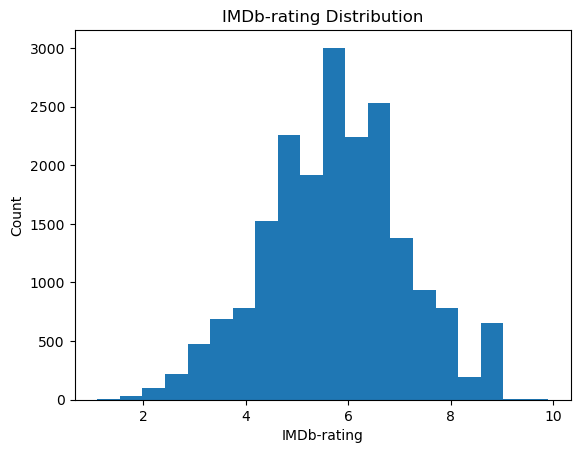

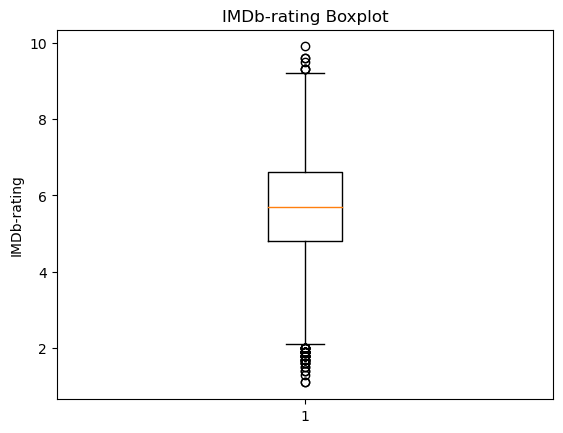

In [188]:
df_cor=df.copy()
df_cor["downloads"] = df["downloads"].apply(pd.to_numeric, errors='coerce')
df_cor["views"] = df["views"].apply(pd.to_numeric, errors='coerce')

# 计算协方差矩阵
corr = abs(df_cor.corr())
col='IMDb-rating'

# 展示协方差矩阵
print(corr)

# 均值化同一量纲后填充
highest_corr = corr[col].sort_values(ascending=False).index[1]
df_cor[col].fillna((df_cor[highest_corr]-df_cor[highest_corr].min())/(df_cor[col].max()-df_cor[col].min())* (df_cor[col]-df_cor[col].min())/(df_cor[col].max()-df_cor[col].min()), inplace=True)

# 绘制填充后的直方图
plt.hist(df_cor["IMDb-rating"], bins=20)
plt.title("IMDb-rating" + ' Distribution')
plt.xlabel("IMDb-rating")
plt.ylabel('Count')
plt.show()

# 绘制填充后的盒图
plt.boxplot(df_cor["IMDb-rating"].dropna())
plt.title("IMDb-rating" + ' Boxplot')
plt.ylabel("IMDb-rating")
plt.show()

### 3.4 通过数据对象之间的相似性来填补缺失值：
通过数据对象之间的相似性来填补缺失值的方法通常采用基于相似性的插值方法，其基本思想是利用已知数据对象之间的相似性来推断未知数据对象的缺失属性值。对于数值属性IMDb-rating，采用其列均值填充。对于标称属性，可以采用其众数填充。

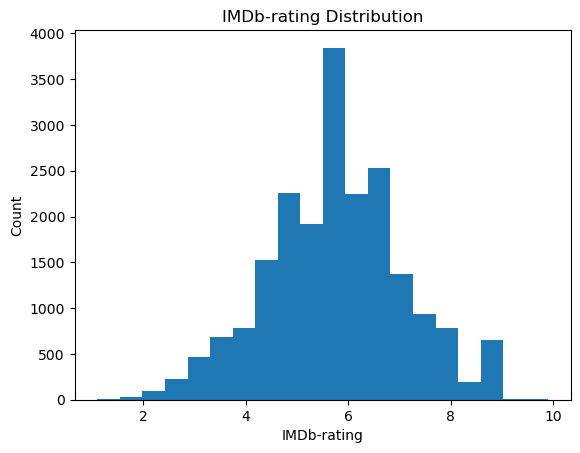

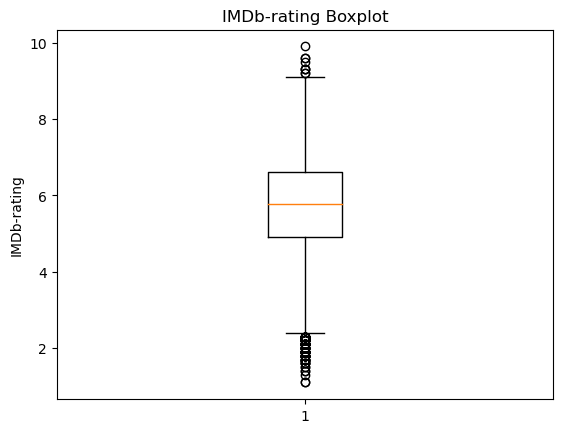

In [189]:
df_sim=df.copy()
col='IMDb-rating'
df_sim[col].fillna(df_sim[col].mean(), inplace=True)
# 绘制填充后的直方图
plt.hist(df_sim["IMDb-rating"], bins=20)
plt.title("IMDb-rating" + ' Distribution')
plt.xlabel("IMDb-rating")
plt.ylabel('Count')
plt.show()

# 绘制填充后的盒图
plt.boxplot(df_sim["IMDb-rating"].dropna())
plt.title("IMDb-rating" + ' Boxplot')
plt.ylabel("IMDb-rating")
plt.show()

仓库：https://github.com/HW-VMCL/DataMining